# Feature Scaling

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn

In [13]:
df = pd.read_csv('Social_Network_Ads (1).csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Select Relevent columns using slicing
- You can write this code also
- data = df[['Age', 'EstimatedSalary', 'Purchased']]

In [14]:
data = df.iloc[:,2:]
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [15]:
df_1 = df[['Age', 'EstimatedSalary', 'Purchased']]
df_1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Split the train test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Purchased', axis = 1),
                                                    data['Purchased'], test_size = 0.3,
                                                    random_state = 0)
X_test.shape, X_train.shape

((120, 2), (280, 2))

# Standard Scalar

In [19]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scalar.fit(X_train)
# mean , std
X_train_Scaled = scalar.transform(X_train)
X_test_Scaled = scalar.transform(X_test)


In [20]:
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [21]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [24]:
X_train_Scaled = pd.DataFrame(X_train_Scaled, columns=X_train.columns)

In [25]:
X_train_Scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [26]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [27]:
np.round(X_train_Scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [28]:
X_test_Scaled = pd.DataFrame(X_test_Scaled, columns = X_test.columns)
X_test_Scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [29]:
np.round(X_test.describe(), 1)

,Age,EstimatedSalary
count,120.0,120.0
mean,37.2,69591.7
std,11.1,32933.7
min,18.0,15000.0
25%,28.0,47000.0
50%,36.0,64500.0
75%,45.2,87000.0
max,60.0,150000.0


In [30]:
np.round(X_test_Scaled.describe(), 1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


# Effect of Scaling

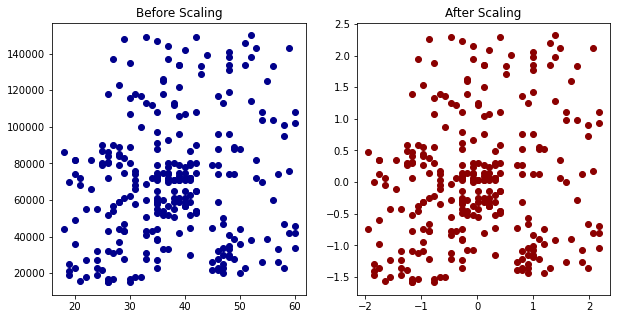

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], color = 'Darkblue')
ax1.set_title("Before Scaling")

ax2.scatter(X_train_Scaled['Age'], X_train_Scaled['EstimatedSalary'], color = 'Darkred')
ax2.set_title("After Scaling")
plt.show()

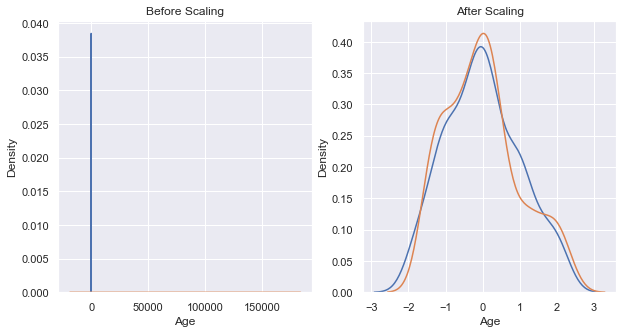

In [33]:
import seaborn as sns
sns.set()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (10,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_Scaled['Age'], ax = ax2)
sns.kdeplot(X_train_Scaled['EstimatedSalary'], ax = ax2)
plt.show()

# Comparision of Distribution

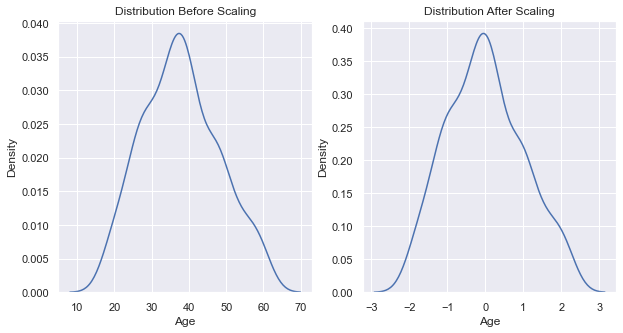

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize = (10,5))
ax1.set_title("Distribution Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)

ax2.set_title("Distribution After Scaling")
sns.kdeplot(X_train_Scaled['Age'], ax = ax2)
plt.show()

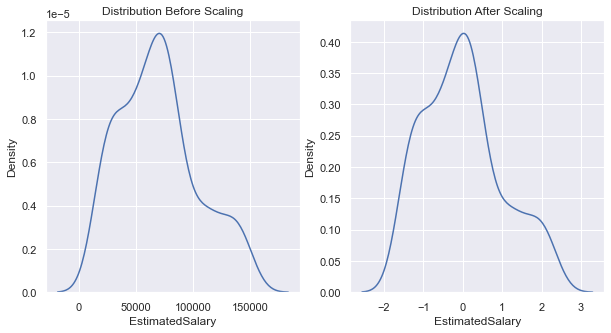

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize = (10,5))
ax1.set_title("Distribution Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

ax2.set_title("Distribution After Scaling")
sns.kdeplot(X_train_Scaled['EstimatedSalary'], ax = ax2)
plt.show()

# Why Scaling is Important

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [40]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_Scaled,y_train)

LogisticRegression()

In [41]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_Scaled)

In [42]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [44]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_Scaled,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_Scaled)

In [46]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8583333333333333
